In [27]:
import json
import matplotlib.pyplot as plt

In [28]:
save_path = "./new/quantum_vs_simulation/"
x_label = "Solution cost"
y_label = "Frequency of solution"

In [29]:
q6_quantum = json.load(open("../results/json/quantum/6/2_1_1_5120_5_quantum.json"))
q6_simulation = json.load(open("../results/json/simulation/6/2_1_1_5120_5_simulation.json"))

q16_quantum = json.load(open("../results/json/quantum/16/2_2_2_10240_5_quantum.json"))
q16_simulation = json.load(open("../results/json/simulation/16/2_2_2_10240_5_simulation.json"))

q16_quantum_20 = json.load(open("../results/json/quantum/16/2_2_2_20480_5_quantum.json"))
q16_simulation_20 = json.load(open("../results/json/simulation/16/2_2_2_20480_5_simulation.json"))

In [30]:
def objective(bit_string, path):
    conf = json.load(open(path, "r"))

    N = conf["N"]  # Number of Teachers
    M = conf["M"]  # Number of Classes
    H = conf["H"]  # Number of hours in week

    T = conf["T"]
    C = conf["C"]
    R = conf["R"]

    def f(i, j, h):
        return int(T[i-1][h-1] == C[j-1][h-1] == '1')

    def tau_value(bit_string, j, h):
        return int(bit_string[(h-1) * M + (j - 1)])

    def lambda_value(bit_string, i, h):
        return int(bit_string[(H * M) + ((h-1) * N + (i - 1))])

    def f_value(bit_string, i, j, h):
        return int(bit_string[(H * M) + (N * H) + ((i - 1) * H * M) + ((j - 1) * H) + (h - 1)])

    # since qiskit represent solution in least significant bit format
    bit_string = bit_string[::-1]
    cost = 0

    # equation a
    for i in range(1, N + 1):
        for j in range(1, M + 1):
            for h in range(1, H + 1):
                if f(i, j, h) != f_value(bit_string, i, j, h):
                    cost += 1

    # equation b
    for i in range(1, N + 1):
        for j in range(1, M + 1):
            temp = 0
            for h in range(1, H + 1):
                temp += f_value(bit_string, i, j, h)
            cost += (temp - R[i-1][j-1])**2

    # equation c
    for j in range(1, M + 1):
        for h in range(1, H + 1):
            temp = 0
            for i in range(1, N + 1):
                temp += f_value(bit_string, i, j, h)
            cost += (temp + tau_value(bit_string, j, h) - 1)**2

    # equation d
    for i in range(1, N + 1):
        for h in range(1, H + 1):
            temp = 0
            for j in range(1, M + 1):
                temp += f_value(bit_string, i, j, h)
            cost += (temp + lambda_value(bit_string, i, h) - 1)**2

    return cost

In [31]:
q6_quantum_dict = {}
q16_quantum_dict = {}
q16_quantum_20_dict = {}

q6_simulation_dict = {}
q16_simulation_dict = {}
q16_simulation_20_dict = {}


for key in q6_quantum:
    if str(key).isnumeric():
        ob = objective(key, "../conf_6.json")
        freq = q6_quantum[key]
        if ob not in q6_quantum_dict:
            q6_quantum_dict[ob] = 0
        q6_quantum_dict[ob] += freq

for key in q6_simulation:
    if str(key).isnumeric():
        ob = objective(key, "../conf_6.json")
        freq = q6_simulation[key]
        if ob not in q6_simulation_dict:
            q6_simulation_dict[ob] = 0
        q6_simulation_dict[ob] += freq

for key in q16_quantum:
    if str(key).isnumeric():
        ob = objective(key, "../conf_16.json")
        freq = q16_quantum[key]
        if ob not in q16_quantum_dict:
            q16_quantum_dict[ob] = 0
        q16_quantum_dict[ob] += freq

for key in q16_simulation:
    if str(key).isnumeric():
        ob = objective(key, "../conf_16.json")
        freq = q16_simulation[key]
        if ob not in q16_simulation_dict:
            q16_simulation_dict[ob] = 0
        q16_simulation_dict[ob] += freq

for key in q16_quantum_20:
    if str(key).isnumeric():
        ob = objective(key, "../conf_16.json")
        freq = q16_quantum_20[key]
        if ob not in q16_quantum_20_dict:
            q16_quantum_20_dict[ob] = 0
        q16_quantum_20_dict[ob] += freq

for key in q16_simulation_20:
    if str(key).isnumeric():
        ob = objective(key, "../conf_16.json")
        freq = q16_simulation_20[key]
        if ob not in q16_simulation_20_dict:
            q16_simulation_20_dict[ob] = 0
        q16_simulation_20_dict[ob] += freq

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


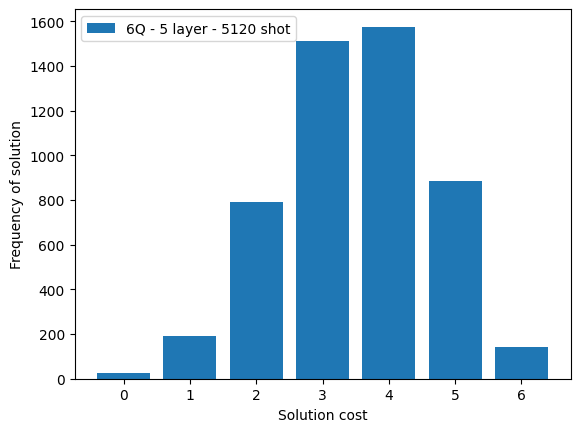

In [32]:
x = list(q6_quantum_dict.keys())
y = list(q6_quantum_dict.values())

plt.bar(x, y, label=f'6Q - 5 layer - 5120 shot')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/6_5120_5_quantum.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


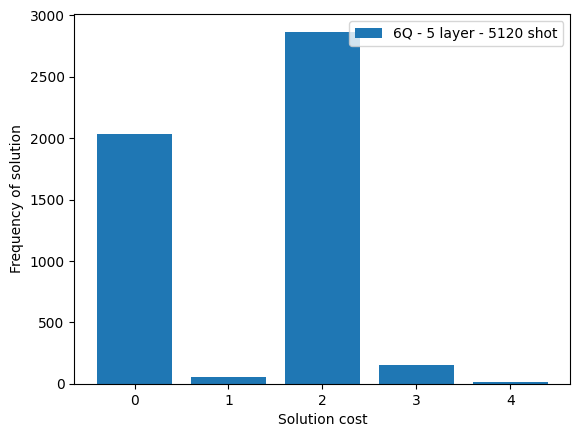

In [33]:
x = list(q6_simulation_dict.keys())
y = list(q6_simulation_dict.values())

plt.bar(x, y, label=f'6Q - 5 layer - 5120 shot')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/6_5120_5_simulation.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


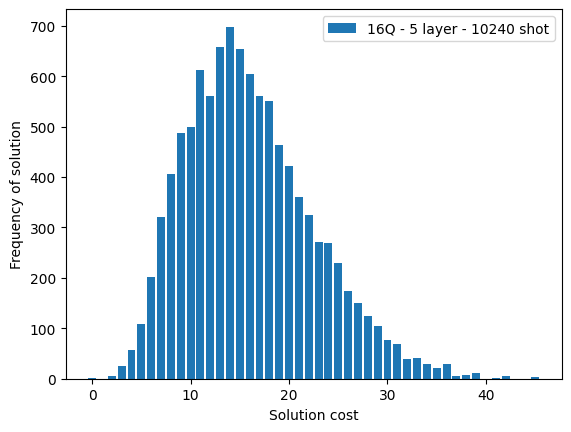

In [34]:
x = list(q16_quantum_dict.keys())
y = list(q16_quantum_dict.values())

plt.bar(x, y, label=f'16Q - 5 layer - 10240 shot')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/16_10240_5_quantum.eps", format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


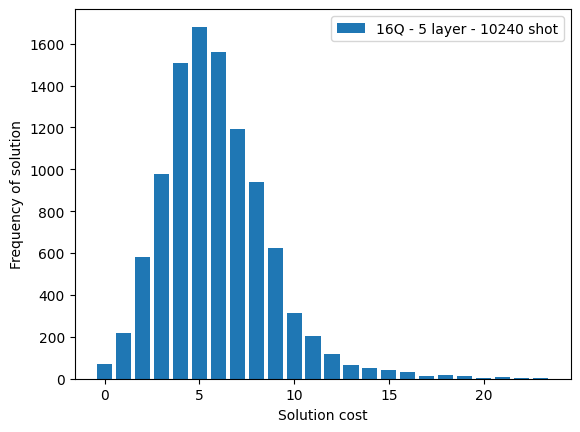

In [35]:
x = list(q16_simulation_dict.keys())
y = list(q16_simulation_dict.values())

plt.bar(x, y, label=f'16Q - 5 layer - 10240 shot')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/16_10240_5_simulation.eps", format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


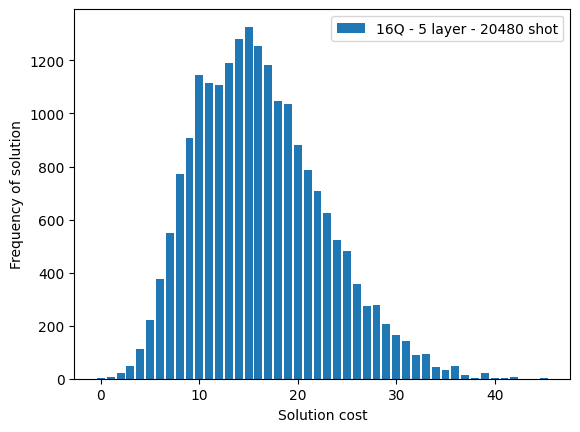

In [36]:
x = list(q16_quantum_20_dict.keys())
y = list(q16_quantum_20_dict.values())

plt.bar(x, y, label=f'16Q - 5 layer - 20480 shot')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/16_20480_5_quantum.eps", format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


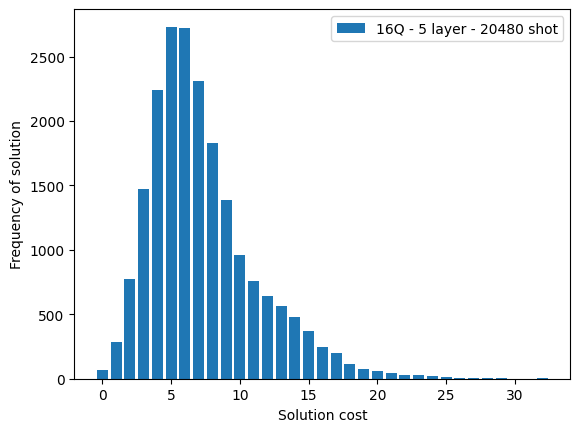

In [37]:
x = list(q16_simulation_20_dict.keys())
y = list(q16_simulation_20_dict.values())

plt.bar(x, y, label=f'16Q - 5 layer - 20480 shot')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/16_20480_5_simulation.eps", format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


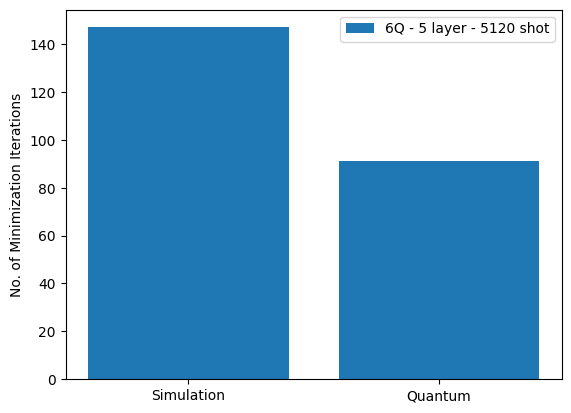

In [38]:
x = list(["Simulation","Quantum"])
y = list([q6_simulation["iterations"],q6_quantum["iterations"]])

y_label = "No. of Minimization Iterations"

plt.bar(x, y, label=f'6Q - 5 layer - 5120 shot')
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/6_5120_5_quantum_simulation_iterations.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


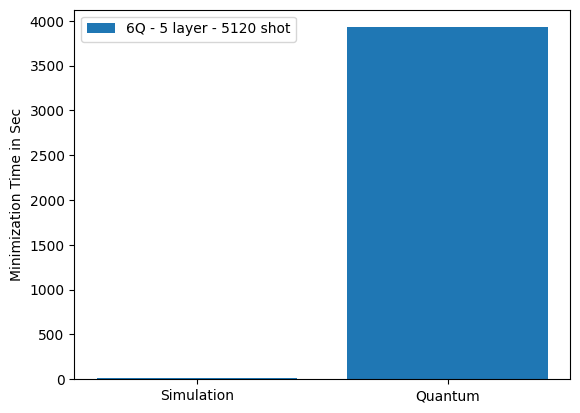

In [39]:
x = list(["Simulation","Quantum"])
y = list([q6_simulation["minimization_time"],q6_quantum["minimization_time"]])

y_label = "Minimization Time in Sec"

plt.bar(x, y, label=f'6Q - 5 layer - 5120 shot')
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/6_5120_5_quantum_simulation_iterations_time.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


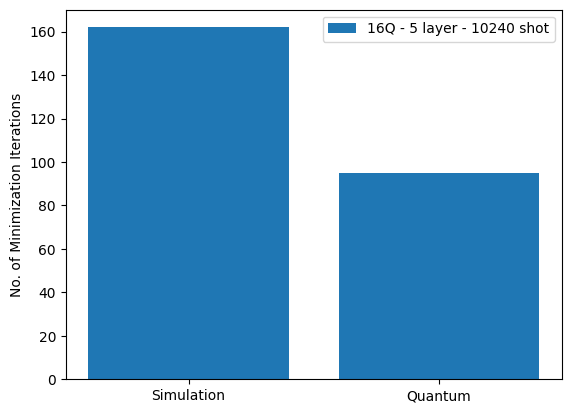

In [40]:
x = list(["Simulation","Quantum"])
y = list([q16_simulation["iterations"],q16_quantum["iterations"]])

y_label = "No. of Minimization Iterations"

plt.bar(x, y, label=f'16Q - 5 layer - 10240 shot')
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/16_10240_5_quantum_simulation_iterations.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


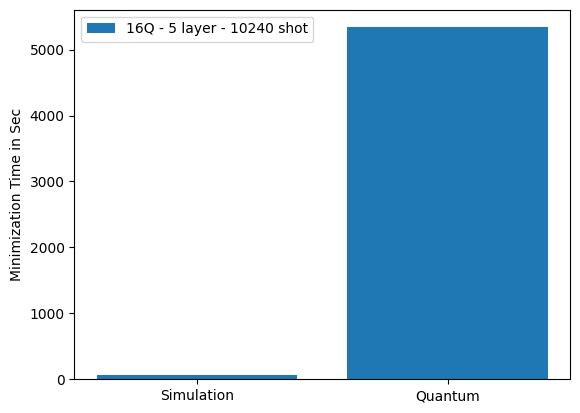

In [41]:
x = list(["Simulation","Quantum"])
y = list([q16_simulation["minimization_time"],q16_quantum["minimization_time"]])

y_label = "Minimization Time in Sec"

plt.bar(x, y, label=f'16Q - 5 layer - 10240 shot')
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/16_10240_5_quantum_simulation_iterations_time.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


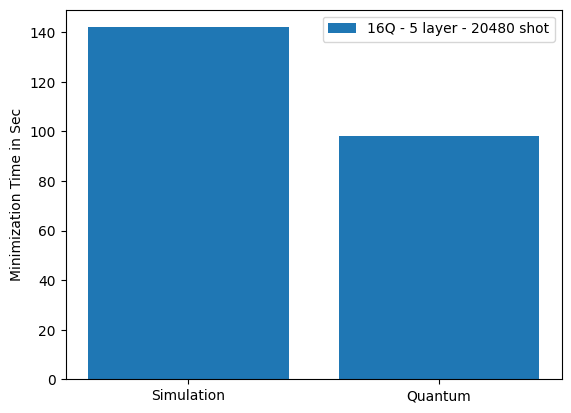

In [42]:
x = list(["Simulation","Quantum"])
y = list([q16_simulation_20["iterations"],q16_quantum_20["iterations"]])

y_label = "Minimization Time in Sec"

plt.bar(x, y, label=f'16Q - 5 layer - 20480 shot')
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/16_20480_5_quantum_simulation_iterations.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


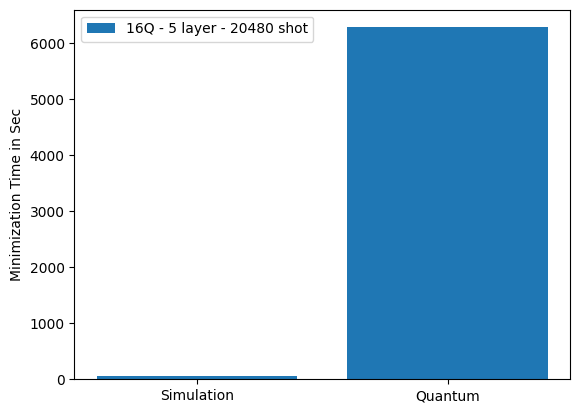

In [43]:
x = list(["Simulation","Quantum"])
y = list([q16_simulation_20["minimization_time"],q16_quantum_20["minimization_time"]])

y_label = "Minimization Time in Sec"

plt.bar(x, y, label=f'16Q - 5 layer - 20480 shot')
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/16_20480_5_quantum_simulation_iterations_time.eps", format='eps')